<a href="https://colab.research.google.com/github/imdeepmind/Natural-Language-Processing-with-Disaster-Tweets/blob/main/NLP_with_disaster_tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Dependencies + Data Unpacking

In [1]:
!unzip nlp-getting-started.zip -d ./data

Archive:  nlp-getting-started.zip
replace ./data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace ./data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: all
error:  invalid response [all]
replace ./data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: ./data/sample_submission.csv  
replace ./data/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: all
error:  invalid response [all]
replace ./data/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./data/test.csv         
  inflating: ./data/train.csv        


In [2]:
!ls

data	  kaggle_prediction.csv    sample_data
data_old  nlp-getting-started.zip  titanic.zip


In [3]:
!ls ./data/

cleaned_test.csv				     sample_submission.csv
cleaned_train.csv				     test.csv
kaggle_prediction_0.8058097890966972_1652638052.csv  train.csv
kaggle_prediction_1652638014.csv


In [4]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

A
     |████████████████████████████████| 12.8 MB 8.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Importing Modules

In [63]:
import pandas as pd
import numpy as np
import spacy

from time import time
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from tqdm import tqdm

In [60]:
nlp = spacy.load("en_core_web_sm")

# Basic EDA + Data Setup

In [6]:
data_train = pd.read_csv("./data/train.csv")
data_test = pd.read_csv("./data/test.csv")

In [7]:
data_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
data_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
data_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
data_train.drop(['keyword', 'location', 'id'], axis=1, inplace=True)
data_test.drop(['keyword', 'location'], axis=1, inplace=True)

In [11]:
data_train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
data_test.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


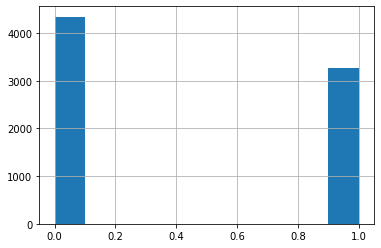

In [13]:
data_train['target'].hist()

In [14]:
X = data_train["text"].values
y = data_train["target"].values

In [15]:
print(f"There are total {len(X)} and {len(y)} in the training dataset")

There are total 7613 and 7613 in the training dataset


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
test_tweets = data_test["text"].values

print(len(test_tweets))

3263


In [18]:
data_test.drop(['text'], inplace=True, axis=1)

# Logistic Regression + TFIDF

In [29]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression(max_iter=200))])

In [30]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(max_iter=200))])

In [31]:
predictions = pipeline.predict(X_test)

In [32]:
print(metrics.confusion_matrix(y_test,predictions))

[[1272  174]
 [ 314  753]]


In [33]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1446
           1       0.81      0.71      0.76      1067

    accuracy                           0.81      2513
   macro avg       0.81      0.79      0.80      2513
weighted avg       0.81      0.81      0.80      2513



In [34]:
accuracy = metrics.accuracy_score(y_test,predictions)
print(metrics.accuracy_score(y_test,predictions))

0.8058097890966972


# SVM + TFIDF

In [49]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [50]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [51]:
predictions = pipeline.predict(X_test)

In [52]:
print(metrics.confusion_matrix(y_test,predictions))

[[1299  147]
 [ 326  741]]


In [53]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1446
           1       0.83      0.69      0.76      1067

    accuracy                           0.81      2513
   macro avg       0.82      0.80      0.80      2513
weighted avg       0.81      0.81      0.81      2513



In [54]:
accuracy = metrics.accuracy_score(y_test,predictions)
print(metrics.accuracy_score(y_test,predictions))

0.8117787504974134


# Logistic Regression + Preprocessed TFIDF

In [61]:
def is_stop_word(word):
  if word not in nlp.Defaults.stop_words:
    return False
  
  return True

In [62]:
def get_lemma(word):
  lemma = word.lemma_.strip()

  if lemma:
    return lemma
  
  return ""

In [72]:
tweets = []

original_tweets = data_train["text"].values

for tweet in tqdm(original_tweets):
  doc = nlp(tweet)

  cleaned_tweet = []

  for w in doc:
    lemma = get_lemma(w)

    cleaned_tweet.append(lemma)
  
  tweets.append(" ".join(cleaned_tweet))

print(original_tweets[:5])
print(tweets[:5])

100%|██████████| 7613/7613 [01:07<00:00, 113.01it/s]

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'
 'Forest fire near La Ronge Sask. Canada'
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"
 '13,000 people receive #wildfires evacuation orders in California '
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ']
['our deed be the reason of this # earthquake may ALLAH forgive we all', 'forest fire near La Ronge Sask . Canada', "all resident ask to ' shelter in place ' be be notify by officer . no other evacuation or shelter in place order be expect", '13,000 people receive # wildfire evacuation order in California', 'just got send this photo from Ruby # Alaska as smoke from # wildfire pour into a school']


In [73]:
X_train, X_test, y_train, y_test = train_test_split(tweets, y, test_size=0.33, random_state=42)

In [74]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression(max_iter=200))])

In [75]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(max_iter=200))])

In [76]:
predictions = pipeline.predict(X_test)

In [77]:
print(metrics.confusion_matrix(y_test,predictions))

[[1266  180]
 [ 327  740]]


In [78]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1446
           1       0.80      0.69      0.74      1067

    accuracy                           0.80      2513
   macro avg       0.80      0.78      0.79      2513
weighted avg       0.80      0.80      0.80      2513



In [79]:
accuracy = metrics.accuracy_score(y_test,predictions)
print(metrics.accuracy_score(y_test,predictions))

0.7982491046557899


# Predictions for Kaggle

In [55]:
kaggle_predictions = pipeline.predict(test_tweets)

In [56]:
data_test["target"] = kaggle_predictions

In [57]:
data_test.head()

,id,target
0,0,0
1,2,0
2,3,1
3,9,0
4,11,1


In [58]:
data_test.to_csv(f"./data/kaggle_prediction_{accuracy}_{int(time())}.csv", index=False)